In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

In [35]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [16]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [27]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 55ms/step - loss: 2.5408 - accuracy: 0.5035 - val_loss: 1.6947 - val_accuracy: 0.6470
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.3610 - accuracy: 0.7186 - val_loss: 1.2702 - val_accuracy: 0.7260
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0123 - accuracy: 0.7839 - val_loss: 1.1358 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8053 - accuracy: 0.8225 - val_loss: 1.0414 - val_accuracy: 0.7700
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6416 - accuracy: 0.8634 - val_loss: 0.9750 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5157 - accuracy: 0.8916 - val_loss: 0.9390 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.4159 - accuracy: 0.9110 - val_loss: 0.9111 - val_accuracy: 0.8150
Epoch 8/20
16

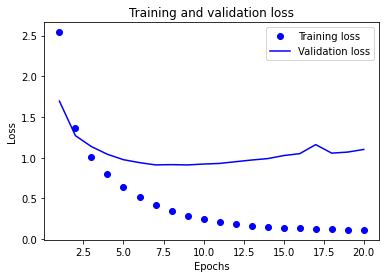

In [28]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

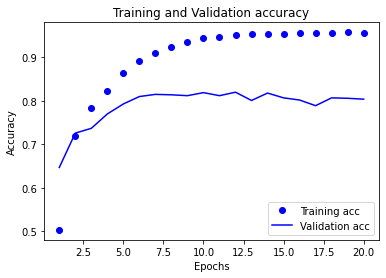

In [33]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [32]:
history.history

{'accuracy': [0.5035079121589661,
  0.7186169028282166,
  0.7838887572288513,
  0.8224755525588989,
  0.8634427189826965,
  0.8916311860084534,
  0.9110498428344727,
  0.9235780239105225,
  0.9358556866645813,
  0.943497896194458,
  0.9478827118873596,
  0.9513906240463257,
  0.9528940320014954,
  0.9536457061767578,
  0.9547732472419739,
  0.9556502103805542,
  0.9556502103805542,
  0.9562765955924988,
  0.9577800035476685,
  0.9560260772705078],
 'loss': [2.5407543182373047,
  1.3610177040100098,
  1.0122979879379272,
  0.8052864670753479,
  0.6415892839431763,
  0.5156716704368591,
  0.4158656597137451,
  0.3456609845161438,
  0.28181108832359314,
  0.24248039722442627,
  0.20631593465805054,
  0.18117786943912506,
  0.16340184211730957,
  0.14992327988147736,
  0.1418548822402954,
  0.13155964016914368,
  0.12427517771720886,
  0.12128525227308273,
  0.1169101670384407,
  0.1124098002910614],
 'val_accuracy': [0.6470000147819519,
  0.7260000109672546,
  0.7369999885559082,
  0.7699

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val,y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 52ms/step - loss: 2.5549 - accuracy: 0.5287 - val_loss: 1.6767 - val_accuracy: 0.6380
Epoch 2/9
16/16 [==============================] - 1s 44ms/step - loss: 1.3911 - accuracy: 0.7031 - val_loss: 1.2944 - val_accuracy: 0.7100
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 1.0393 - accuracy: 0.7806 - val_loss: 1.1310 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 1s 44ms/step - loss: 0.8193 - accuracy: 0.8280 - val_loss: 1.0232 - val_accuracy: 0.7850
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6505 - accuracy: 0.8641 - val_loss: 0.9645 - val_accuracy: 0.7900
Epoch 6/9
16/16 [==============================] - 1s 44ms/step - loss: 0.5225 - accuracy: 0.8877 - val_loss: 0.9298 - val_accuracy: 0.8030
Epoch 7/9
16/16 [==============================] - 1s 43ms/step - loss: 0.4188 - accuracy: 0.9137 - val_loss: 0.9297 - val_accuracy: 0.7980
Epoch 8/9
16/16 [===

In [37]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.17764915405164738

In [38]:
predictions = model.predict(x_test)

In [39]:
predictions[0]

array([5.9574839e-05, 4.3428736e-04, 1.1674442e-05, 9.0467483e-01,
       8.6162724e-02, 2.9894252e-06, 5.2231680e-05, 6.6141482e-05,
       2.8152545e-03, 4.1706771e-06, 6.8643240e-05, 5.3027022e-04,
       3.2391825e-05, 8.1067141e-05, 2.4595349e-05, 1.1076044e-04,
       1.3123706e-03, 4.0366792e-04, 1.3951647e-04, 2.3074684e-04,
       1.3215132e-03, 8.3527935e-05, 1.6070435e-05, 1.3366656e-04,
       1.8456954e-05, 9.2871860e-06, 1.9622657e-06, 1.4417834e-04,
       6.0771608e-06, 7.5518583e-05, 1.5520239e-04, 2.4080606e-05,
       1.6000149e-05, 3.8448838e-06, 1.2875813e-04, 4.1705960e-05,
       1.9943991e-04, 8.8055815e-05, 2.0437687e-05, 5.0633567e-05,
       2.0031093e-05, 1.7456415e-04, 1.6690259e-06, 1.3596903e-05,
       1.9580886e-05, 1.4067999e-05], dtype=float32)

In [42]:
predictions[0].shape

(46,)

In [43]:
np.sum(predictions[0])

0.9999999

In [47]:
np.argmax(predictions[0])

3

In [48]:
# 정수 텐서 변환
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [51]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val,y_val))

Epoch 1/20
63/63 [==============================] - 2s 29ms/step - loss: 1.6270 - accuracy: 0.6437 - val_loss: 1.1362 - val_accuracy: 0.7430
Epoch 2/20
63/63 [==============================] - 2s 26ms/step - loss: 0.8308 - accuracy: 0.8099 - val_loss: 0.9223 - val_accuracy: 0.8060
Epoch 3/20
63/63 [==============================] - 2s 26ms/step - loss: 0.4907 - accuracy: 0.8916 - val_loss: 1.1637 - val_accuracy: 0.7370
Epoch 4/20
63/63 [==============================] - 2s 26ms/step - loss: 0.3184 - accuracy: 0.9303 - val_loss: 0.9024 - val_accuracy: 0.8190
Epoch 5/20
63/63 [==============================] - 2s 26ms/step - loss: 0.2379 - accuracy: 0.9442 - val_loss: 0.9376 - val_accuracy: 0.8190
Epoch 6/20
63/63 [==============================] - 2s 26ms/step - loss: 0.1958 - accuracy: 0.9490 - val_loss: 0.9700 - val_accuracy: 0.8130
Epoch 7/20
63/63 [==============================] - 2s 25ms/step - loss: 0.1643 - accuracy: 0.9536 - val_loss: 1.0830 - val_accuracy: 0.7850
Epoch 8/20
63